# Loan Default Prediction

In [18]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 



In [19]:
# Load the Loan Default Prediction dataset
df = pd.read_csv('/kaggle/input/loan-default-prediction/Default_Fin.csv')

print(df.head()) # display the first few rows of the data
print (df.shape) # (rows,columns)
print (df.dtypes) # data types
print(df.describe()) #summary statistics

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0
(10000, 5)
Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object
             Index      Employed  Bank Balance  Annual Salary    Defaulted?
count  10000.00000  10000.000000  10000.000000   10000.000000  10000.000000
mean    5000.50000      0.705600  10024.498524  402203.782224      0.033300
std     2886.89568      0.455795   5804.579486  160039.674988      0.179428
min        1.00000      0.000000      0.000000    9263.640000      0.000000
25%     2500.75000      0.000000   5780.790000  256085.520000      0.000000
50%     5000.50000      1.000000  

**Logistic Regression Model**

In [20]:
#Define X (input features) and y (target variable)
X = df[['Employed', 'Bank Balance', 'Annual Salary']]
y = df['Defaulted?']

In [21]:
# Split training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

# Intialize logistic regression model,and train model using training data
# random_state=0 ensures that results are reproducible
#  X_train represents input features (independent variables)
# y_train represents the target variable (dependent variable) that the model is trying to predict

#Normalize the data
mean = np.mean(X_train, axis=0) 
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

log_reg = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [22]:
log_reg.predict(X_train) #generate predictions using inputs from X_train

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
log_reg.score(X_train, y_train) # calculates accuracy of the the model on the training data

0.9732857142857143

In [24]:
log_reg.score(X_test, y_test) # calculates accuracy of the the model on the test data

0.9726666666666667

**Visualize results with Confusion Matrix**

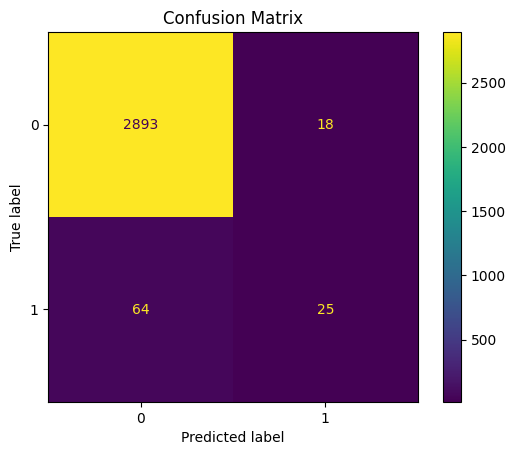

In [25]:

# Generate predictions
y_pred = log_reg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

**Using Coeffiecients from Logistic Regression to Determine Feature Importance**

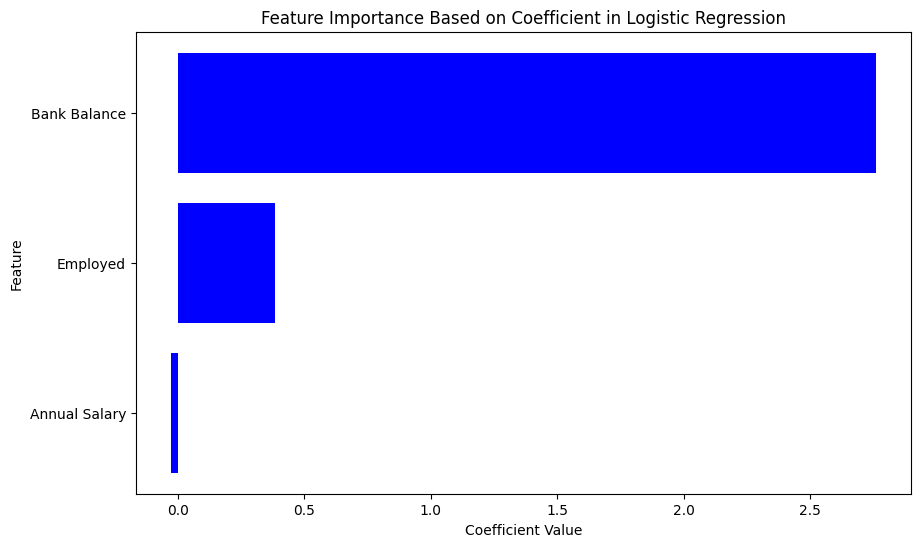

In [26]:

feature_names = X_train.columns.tolist()  # Replace with actual feature names
coefficients = log_reg.coef_[0]  # Extracting the coefficients for binary classification
# Step 3: Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
# Step 4: Sort by absolute value of coefficients to see the most impactful variables
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
# Step 5: Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Coefficient in Logistic Regression')
plt.gca().invert_yaxis()  # To show the largest coefficient at the top
plt.show()

**Initialize RFE from 3 features down to 1 feature** 

In [27]:
# Define the RFE model using Logistic Regression as the estimator
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator, n_features_to_select=3)  # You can adjust the number of features

# Fit RFE on the training data
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i] == 1:
         print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
            
            
from sklearn.metrics import accuracy_score 

# Make predictions on the test data
y_pred = rfe.predict(X_test)

# Evaluate the model's performance
accuracy_3features = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_3features * 100:.2f}%')

Column: Employed, Selected True, Rank: 1.000
Column: Bank Balance, Selected True, Rank: 1.000
Column: Annual Salary, Selected True, Rank: 1.000
Accuracy: 97.27%


In [28]:
# Define the RFE model using Logistic Regression as the estimator
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator, n_features_to_select=2)  # You can adjust the number of features

# Fit RFE on the training data
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i] == 1:
         print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
            
from sklearn.metrics import accuracy_score 

# Make predictions on the test data
y_pred = rfe.predict(X_test)

# Evaluate the model's performance
accuracy_2features = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_2features * 100:.2f}%')

Column: Employed, Selected True, Rank: 1.000
Column: Bank Balance, Selected True, Rank: 1.000
Accuracy: 97.30%


In [29]:
# Define the RFE model using Logistic Regression as the estimator
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator, n_features_to_select=1)  # You can adjust the number of features

# Fit RFE on the training data
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i] == 1:
         print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
            
from sklearn.metrics import accuracy_score 

# Make predictions on the test data
y_pred = rfe.predict(X_test)

# Evaluate the model's performance
accuracy_1feature = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_1feature * 100:.2f}%')

Column: Bank Balance, Selected True, Rank: 1.000
Accuracy: 97.33%


In [30]:
model = LogisticRegression(fit_intercept=True, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 97.27%


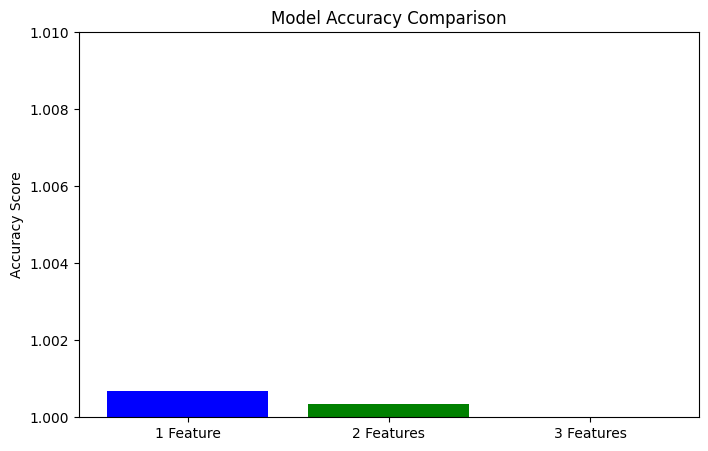

In [31]:
# Create a bar plot for accuracy
plt.figure(figsize=(8, 5))
plt.bar(['1 Feature', '2 Features', '3 Features'], 
        [accuracy_1feature/accuracy_3features, accuracy_2features/accuracy_3features, accuracy_3features/accuracy_3features],
        color=['blue', 'green', 'orange'])

plt.ylim(1, 1.01)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.show()